#LSTM


In [ ]:
# Importing the libraries
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
# Loading the IMDB dataset
imdb = keras.datasets.imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=50000)
print(x_train.size)
print(x_test.shape)
# Padding sequences
max_len = 200
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)
y_test = np.array(y_test)
y_train = np.array(y_train)
# Building the model
model = keras.Sequential()
model.add(layers.Embedding(50000, 128, input_length=max_len))
model.add(layers.SimpleRNN(64, return_sequences=True)) # Corrected placement of
model.add(layers.LSTM(64))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
# Display the model summary
print(model.summary())
# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Training the model
history = model.fit(x_train, y_train,
 epochs=2,
 validation_data=(x_test, y_test))

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
25000
(25000,)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 238s 295ms/step - accuracy: 0.7046 - loss: 0.5403 - val_accuracy: 0.8103 - val_loss: 0.4270
Epoch 2/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 294s 343ms/step - accuracy: 0.9011 - loss: 0.2585 - val_accuracy: 0.8573 - val_loss: 0.3630


In [ ]:
# Printing the history of loss and accuracy
print("loss = ",history.history['loss'])
print("accuracy = ",history.history['accuracy'])

loss =  [0.45790761709213257, 0.2578491270542145]
accuracy =  [0.7825199961662292, 0.900160014629364]


CNN

In [ ]:
# Importing the libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the IMDB dataset
mnist = keras.datasets.mnist
(xtrain, ytrain),(xtest, ytest) = mnist.load_data()
print("xtrain_Shape = ", xtrain.shape)
print("ytrain_Shape = ", ytrain.shape)
print("xtest_Shape = ", xtest.shape)
print("ytest_Shape = ", ytest.shape)

#normalizing the pixel values
xtrain = xtrain/255
xtest = xtest/255

# Building the model
#defining model
model = Sequential()

#adding convolution layer
model.add(Conv2D(128,(2,2), activation = "relu", input_shape=(28,28,1)))

#adding pooling layer
model.add(MaxPool2D((2,2)))

#adding convolution layer
model.add(Conv2D(32,(2,2), activation = "relu"))

#adding pooling layer
model.add(MaxPool2D((2,2)))

#adding fully connected layer
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(30, activation = "relu"))
model.add(Dense(45, activation = "relu"))

#adding output layer
model.add(Dense(10, activation = "softmax"))
model.summary()

# Compiling the model
model.compile(optimizer = "Adam",
 loss = "sparse_categorical_crossentropy",
 metrics = ["accuracy"])

# Training the model
model.fit(xtrain, ytrain, epochs = 5, batch_size = 128)
score = model.evaluate(xtest,ytest,verbose=0)

# Printing the history of loss and accuracy
print("loss", score[0]*100)
print("accuracy", score[1]*100)

xtrain_Shape =  (60000, 28, 28)
ytrain_Shape =  (60000,)
xtest_Shape =  (10000, 28, 28)
ytest_Shape =  (10000,)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 27, 27, 128)         │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 32)          │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 30)                  │           3,870 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 45)                  │           1,395 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             460 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 170,365 (665.49 KB)

 Trainable params: 170,365 (665.49 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7678 - loss: 0.6866
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9748 - loss: 0.0805
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9825 - loss: 0.0576
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9867 - loss: 0.0404
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9912 - loss: 0.0304
loss 3.6776460707187653
accuracy 98.78000020980835


In [ ]:
# Printing the history of loss and accuracy
print("loss", score[0]*100)
print("accuracy", score[1]*100)

loss 3.6776460707187653
accuracy 98.78000020980835


AlexNet

In [ ]:
#AlexNet Architecture

import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.layers.advanced_activations import LeakyReLU
#from tensorflow.keras.datasets import cifar10
from tensorflow import keras
from tensorflow.keras.layers import BatchNormalization
#from tensorflow.keras.layers as layers

model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters = 96, input_shape = (227, 227, 3),
			kernel_size = (11, 11), strides = (4, 4),
			padding = 'valid', activation="relu"))
#model.add(activation='relu')
# Max-Pooling
model.add(MaxPooling2D(pool_size = (2, 2),
			strides = (2, 2), padding = 'valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters = 256, kernel_size = (11, 11),
			strides = (1, 1), padding = 'valid', activation="relu"))
#model.add(activation('relu'))
# Max-Pooling
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2),
			padding = 'valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters = 384, kernel_size = (3, 3),
			strides = (1, 1), padding = 'valid', activation="relu"))
#model.add(activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters = 384, kernel_size = (3, 3),
			strides = (1, 1), padding = 'valid', activation="relu"))
#model.add(activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters = 256, kernel_size = (3, 3),
			strides = (1, 1), padding = 'valid', activation="relu"))
#model.add(activation('relu'))
# Max-Pooling
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2),
			padding = 'valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Flattening
model.add(Flatten())

# 1st Dense Layer
model.add(Dense(4096, input_shape = (224*224*3, ), activation="relu"))
#model.add(activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096, activation="relu"))
#model.add(activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Softmax Layer
model.add(Dense(1000, activation="softmax"))
#model.add(activation('softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 55, 55, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 27, 27, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 17, 17, 256)         │       2,973,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 6, 6, 384)           │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 4, 4, 384)           │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 2, 2, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 1, 1, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 4096)                │       1,052,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 4096)                │          16,384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 28,075,752 (107.10 MB)

 Trainable params: 28,056,616 (107.03 MB)

 Non-trainable params: 19,136 (74.75 KB)

LeNet5

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)

# Padding
x_train=np.pad(x_train[:,], ((0,0),(2,2),(2,2)), 'constant')
x_test=np.pad(x_test[:,], ((0,0),(2,2),(2,2)), 'constant')
print('After Padding')
print(x_train.shape)
print(x_test.shape)


(60000, 28, 28)
(10000, 28, 28)
After Padding
(60000, 32, 32)
(10000, 32, 32)


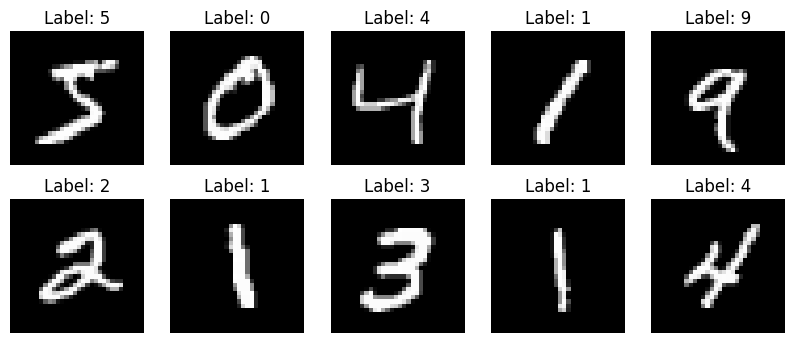

In [ ]:
plt.figure(figsize=(10, 4))  # Set The size Of The Figure
for i in range(10):
    plt.subplot(2, 5, i + 1)  # Make subplots for 10 images
    plt.imshow(x_train[i], cmap='gray')  # Display The grayscale images
    plt.title(f"Label: {y_train[i]}")  # Add labels
    plt.axis('off')  # Axis Labels Turned Off
plt.show()  # Displaying the plot

In [ ]:

x_train=x_train/255.0
x_test = x_test / 255.0

In [ ]:
x_train = x_train.reshape(-1, 32, 32, 1)
x_test = x_test.reshape(-1, 32, 32, 1)
print(x_test.shape)


(10000, 32, 32, 1)


In [ ]:
#Create An Instance of Sequential Class.
LeNet5_Model=Sequential()
# Add First Convolutional Layer
LeNet5_Model.add(Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(32, 32, 1)))
# Add First Average Pooling Layer
LeNet5_Model.add(AveragePooling2D((2, 2)))
# Add Second Convolutional Layer
LeNet5_Model.add(Conv2D(16, kernel_size=(5, 5), activation='tanh'))
# Add Second Average Pooling Layer
LeNet5_Model.add(AveragePooling2D((2, 2)))
# Flatten The Layer
LeNet5_Model.add(Flatten())
# Add Dense Layer
LeNet5_Model.add(Dense(120, activation='tanh'))
LeNet5_Model.add(Dense(84, activation='tanh'))
LeNet5_Model.add(Dense(10, activation='softmax'))

In [ ]:
LeNet5_Model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
LeNet5_Model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 120)                 │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history1=LeNet5_Model.fit(x_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8709 - loss: 0.4420 - val_accuracy: 0.9655 - val_loss: 0.1165
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9682 - loss: 0.1086 - val_accuracy: 0.9700 - val_loss: 0.0999
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9781 - loss: 0.0727 - val_accuracy: 0.9794 - val_loss: 0.0719
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9837 - loss: 0.0502 - val_accuracy: 0.9787 - val_loss: 0.0723
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9876 - loss: 0.0375 - val_accuracy: 0.9807 - val_loss: 0.0698


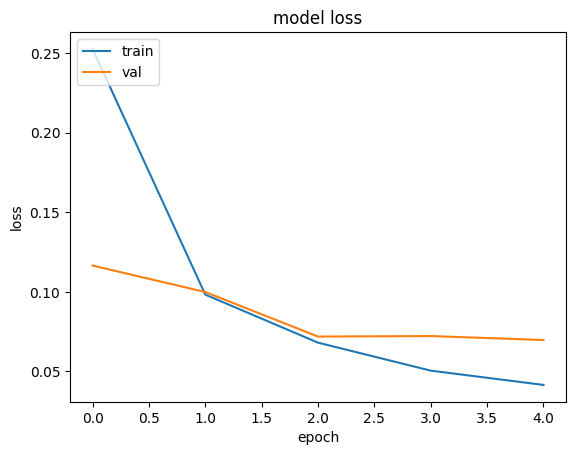

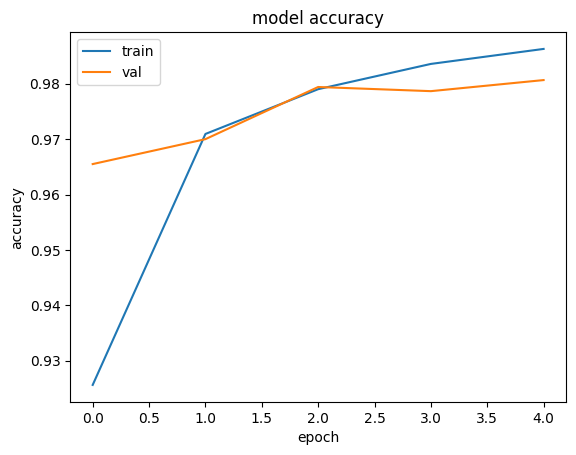

In [ ]:
from matplotlib import pyplot as plt
# Show the learning curves
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()



plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [ ]:
test_loss,test_acc=LeNet5_Model.evaluate(x_test,y_test)
print('Accuracy',test_acc)
print('Loss',test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9779 - loss: 0.0780
Accuracy 0.9811000227928162
Loss 0.0658016949892044


deep NN

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
mnist = keras.datasets.mnist
(xtrain, ytrain),(xtest, ytest) = mnist.load_data()
print("xtrain_Shape = ", xtrain.shape)
print("ytrain_Shape = ", ytrain.shape)
print("xtest_Shape = ", xtest.shape)
print("ytest_Shape = ", ytest.shape)
xtrain = xtrain/255
xtest = xtest/255
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation = "relu"))
model.add(Dense(30, activation = "relu"))
model.add(Dense(45, activation = "relu"))
model.add(Dense(10, activation = "softmax"))
model.summary()
model.compile(optimizer = "Adam",
 loss = "sparse_categorical_crossentropy",
 metrics = ["accuracy"])
model.fit(xtrain, ytrain, epochs = 5, batch_size = 128)
score = model.evaluate(xtest,ytest,verbose=0)
print("loss", score[0]*100)
print("accuracy", score[1]*100)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
xtrain_Shape =  (60000, 28, 28)
ytrain_Shape =  (60000,)
xtest_Shape =  (10000, 28, 28)
ytest_Shape =  (10000,)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │           3,870 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 45)                  │           1,395 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             460 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 106,205 (414.86 KB)

 Trainable params: 106,205 (414.86 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7927 - loss: 0.7137
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9565 - loss: 0.1544
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9696 - loss: 0.1028
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9767 - loss: 0.0785
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9819 - loss: 0.0618
loss 8.595001697540283
accuracy 97.32000231742859


SHALLOW NEURAL NETWORK

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
(xtrain, ytrain),(xtest, ytest) = mnist.load_data()
print("xtrain_Shape = ", xtrain.shape)
print("ytrain_Shape = ", ytrain.shape)
print("xtest_Shape = ", xtest.shape)
print("ytest_Shape = ", ytest.shape)
xtrain = xtrain/255
xtest = xtest/255
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation = "relu"))
model.add(Dense(10, activation = "softmax"))
model.summary()
model.compile(optimizer = "Adam",
 loss = "sparse_categorical_crossentropy",
 metrics = ["accuracy"])
model.fit(xtrain, ytrain, epochs = 5, batch_size = 128)
score = model.evaluate(xtest,ytest,verbose=0)
print("loss", score[0]*100)
print("accuracy", score[1]*100)

xtrain_Shape =  (60000, 28, 28)
ytrain_Shape =  (60000,)
xtest_Shape =  (10000, 28, 28)
ytest_Shape =  (10000,)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8303 - loss: 0.6141
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9516 - loss: 0.1715
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9658 - loss: 0.1172
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9744 - loss: 0.0880
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9793 - loss: 0.0732
loss 8.552789688110352
accuracy 97.32000231742859


Autoencoder

In [ ]:
#Autoencoder

import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dense
#,Conv2D,MaxPooling2D,UpSampling2D
from tensorflow.keras import Input, Model
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt




(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print('x_train.shape =',x_train.shape)
print('y_train.shape =',y_train.shape)
print('x_test.shape =',x_test.shape)
print('y_test.shape =',y_test.shape)


x_train.shape = (60000, 28, 28)
y_train.shape = (60000,)
x_test.shape = (10000, 28, 28)
y_test.shape = (10000,)


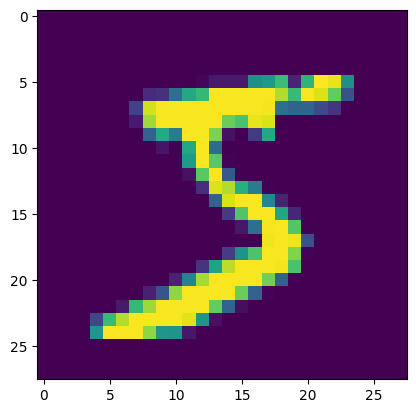

In [ ]:
plt.imshow(x_train[0].reshape(28,28))

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
encoding_dim = 15
input_img = Input(shape=(784,))
# encoded representation of input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# decoded representation of code
decoded = Dense(784, activation='sigmoid')(encoded)
# Model which take input image and shows decoded images
autoencoder = Model(input_img, decoded)


In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                validation_data=(x_test, x_test))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.4247 - val_loss: 0.2195
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.2106 - val_loss: 0.1843
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.1792 - val_loss: 0.1635
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.1623 - val_loss: 0.1533
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1531 - val_loss: 0.1474


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


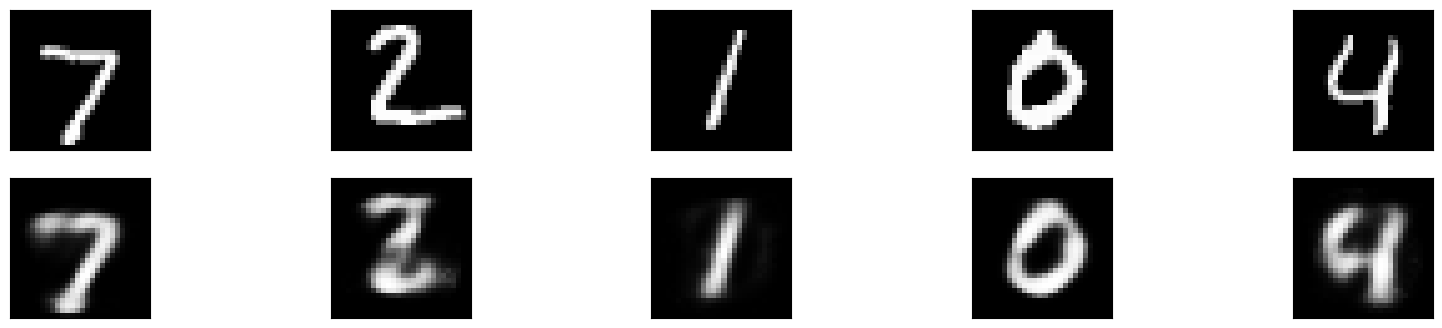

In [ ]:
Decode=autoencoder.predict(x_test)

plt.figure(figsize=(20, 4))

for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(Decode[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# Create seperate Models for Encoding and decoding
# This model shows encoded images
encoder = Model(input_img, encoded)
# Creating a decoder model
encoded_input = Input(shape=(encoding_dim,))
# last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


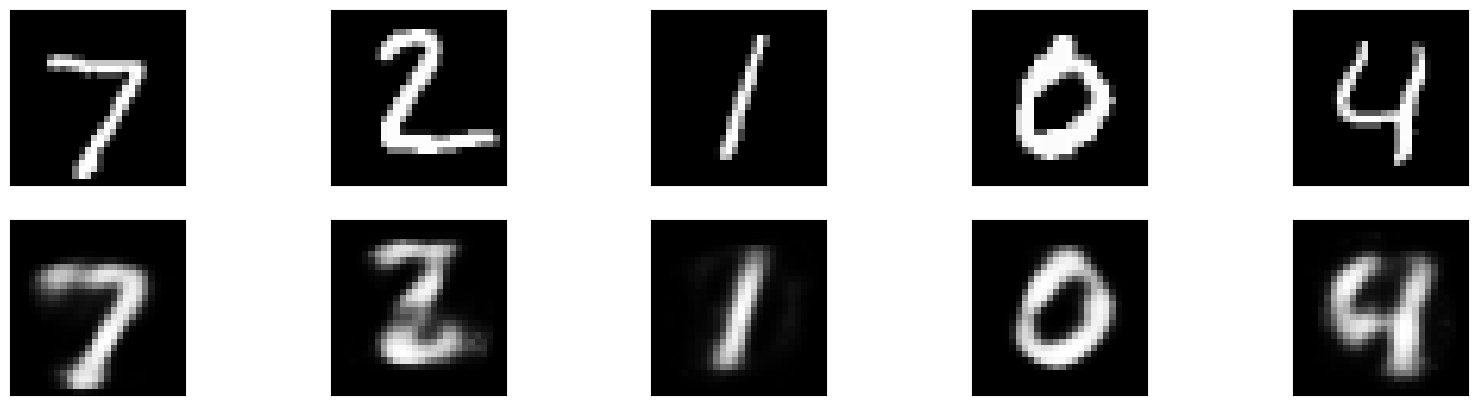

In [ ]:
encoded_img = encoder.predict(x_test)
decoded_img = decoder.predict(encoded_img)

plt.figure(figsize=(20, 5))

for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Denoise Autoencoder

In [ ]:
# Denoise Autoencoder
#import all the dependencies
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from tensorflow.keras import Input, Model
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('x_train.shape =',x_train.shape)
print('y_train.shape =',y_train.shape)
print('x_test.shape =',x_test.shape)
print('y_test.shape =',y_test.shape)


x_train.shape = (60000, 28, 28)
y_train.shape = (60000,)
x_test.shape = (10000, 28, 28)
y_test.shape = (10000,)


In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


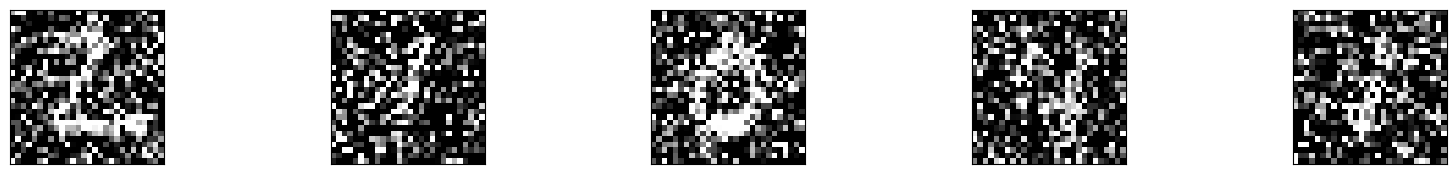

In [ ]:
noise_factor = 0.7
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

#Here is how the noisy images look right now.
plt.figure(figsize=(20, 2))
for i in range(1, 5 + 1):
    ax = plt.subplot(1, 5, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential

model = Sequential()
# encoder network
model.add(Conv2D(35, 3, activation= 'relu', padding='same', input_shape = (28,28,1)))
model.add(MaxPooling2D(2, padding= 'same'))
model.add(Conv2D(25, 3, activation= 'relu', padding='same'))
model.add(MaxPooling2D(2, padding= 'same'))
#decoder network
model.add(Conv2D(25, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(35, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(1,3,activation='sigmoid', padding= 'same')) # output layer
model.compile(optimizer= 'adam', loss = 'binary_crossentropy')
model.fit(x_train_noisy, x_train,
                epochs=5,
                batch_size=128,
                validation_data=(x_test_noisy, x_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 191s 401ms/step - loss: 0.2720 - val_loss: 0.1511
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 192s 382ms/step - loss: 0.1476 - val_loss: 0.1394
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 199s 375ms/step - loss: 0.1386 - val_loss: 0.1341
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 203s 378ms/step - loss: 0.1341 - val_loss: 0.1301
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 209s 394ms/step - loss: 0.1308 - val_loss: 0.1282


313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step


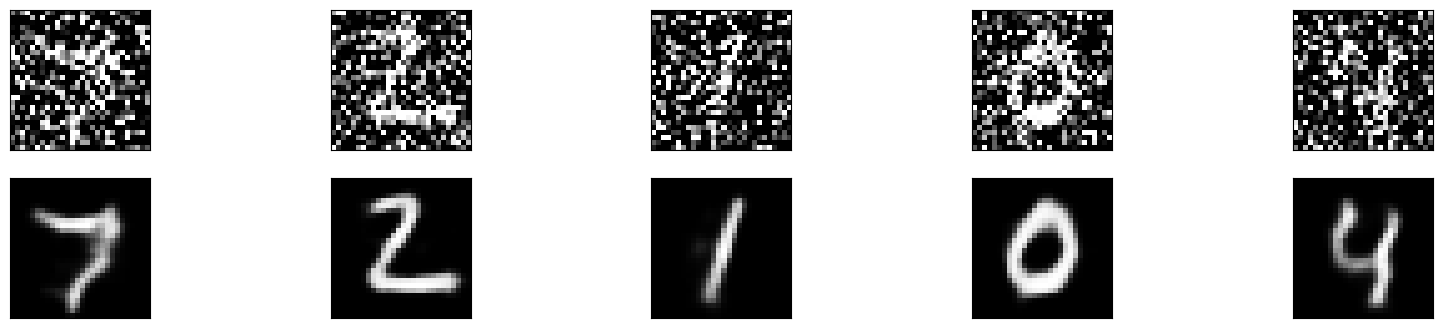

In [ ]:
pred = model.predict(x_test_noisy)
plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(pred[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Deep CNN autoencoder

In [ ]:

#Deep CNN autoencoder

#import all the dependencies
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from tensorflow.keras import Input, Model
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('x_train.shape =',x_train.shape)
print('y_train.shape =',y_train.shape)
print('x_test.shape =',x_test.shape)
print('y_test.shape =',y_test.shape)

x_train.shape = (60000, 28, 28)
y_train.shape = (60000,)
x_test.shape = (10000, 28, 28)
y_test.shape = (10000,)


In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
from tensorflow.keras.models import Sequential

model = Sequential()

# encoder network
model.add(Conv2D(30, 3, activation= 'relu', padding='same', input_shape = (28,28,1)))
model.add(MaxPooling2D(2, padding= 'same'))
model.add(Conv2D(15, 3, activation= 'relu', padding='same'))
model.add(MaxPooling2D(2, padding= 'same'))

#decoder network
model.add(Conv2D(15, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(30, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(1,3,activation='sigmoid', padding= 'same')) # output layer

model.compile(optimizer= 'adam', loss = 'binary_crossentropy')
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 30)          │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 30)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 15)          │           4,065 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 15)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 7, 7, 15)            │           2,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (None, 14, 14, 15)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 14, 14, 30)          │           4,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_3 (UpSampling2D)       │ (None, 28, 28, 30)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 1)           │             271 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,756 (42.02 KB)

 Trainable params: 10,756 (42.02 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(x_train, x_train,
                epochs=5,
                batch_size=128,
                validation_data=(x_test, x_test))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 129s 271ms/step - loss: 0.2389 - val_loss: 0.0815
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 146s 279ms/step - loss: 0.0804 - val_loss: 0.0758
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 147s 290ms/step - loss: 0.0756 - val_loss: 0.0735
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 136s 279ms/step - loss: 0.0739 - val_loss: 0.0722
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 144s 284ms/step - loss: 0.0727 - val_loss: 0.0713


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step


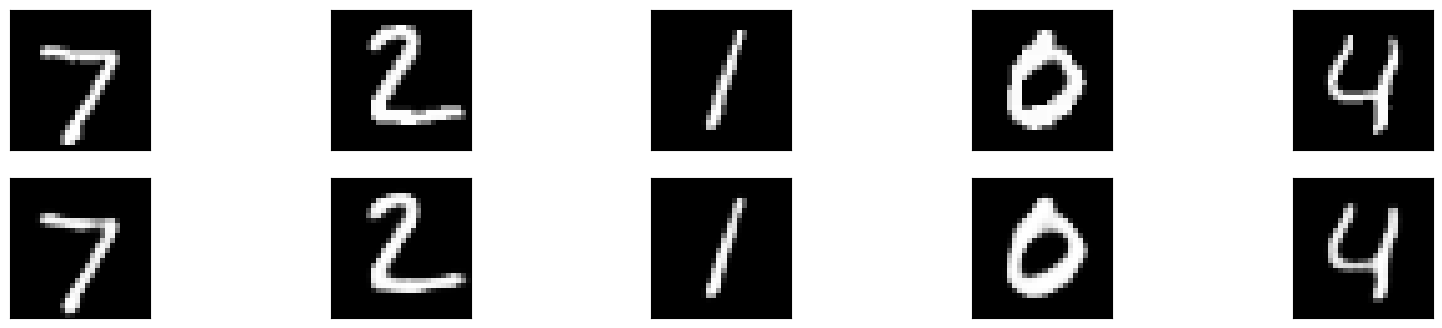

In [ ]:
pred = model.predict(x_test)

plt.figure(figsize=(20, 4))

for i in range(5):

    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(pred[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

PERCEPTRON MODEL

In [ ]:
# AND GATE
import pandas as pd
import numpy as np
def unitstep(v):
 if v >= 0:
  return 1
 else:
  return 0
def perceptron_model(x,w,b):
 v = np.dot(w,x)+b
 y = unitstep(v)
 return y
def AND_LogicFunction(x):
 w = np.array([1,1])
 b = -1.5
 return perceptron_model(x,w,b)

t1 = np.array([0,1])
t2 = np.array([1,1])
t3 = np.array([0,0])
t4 = np.array([1,0])

print("AND({},{})={}".format(0,1,AND_LogicFunction(t1)))
print("AND({},{})={}".format(1,1,AND_LogicFunction(t2)))
print("AND({},{})={}".format(0,0,AND_LogicFunction(t3)))
print("AND({},{})={}".format(1,0,AND_LogicFunction(t4)))

AND(0,1)=0
AND(1,1)=1
AND(0,0)=0
AND(1,0)=0


In [ ]:
# OR GATE
import pandas as pd
import numpy as np
def unitstep(v):
 if v >= 0:
  return 1
 else:
  return 0
def perceptron_model(x,w,b):
 v = np.dot(w,x)+b
 y = unitstep(v)
 return y
def OR_LogicFunction(x):
 w = np.array([1,1])
 b = -1
 return perceptron_model(x,w,b)
t1 = np.array([0,1])
t2 = np.array([1,1])
t3 = np.array([0,0])
t4 = np.array([1,0])

print("AND({},{})={}".format(0,1,OR_LogicFunction(t1)))
print("AND({},{})={}".format(1,1,OR_LogicFunction(t2)))
print("AND({},{})={}".format(0,0,OR_LogicFunction(t3)))
print("AND({},{})={}".format(1,0,OR_LogicFunction(t4)))

AND(0,1)=1
AND(1,1)=1
AND(0,0)=0
AND(1,0)=1


In [ ]:
import numpy as np
import pandas as pd
def unitstep(v):
 if v>0:
  return 1
 else:
  return 0
def perceptron_model(x,w,b):
 v = np.dot(w, x)+b
 y = unitstep(v)
 return y
def OR_LogicFunction(x):
 w = np.array([1])
 b = 0
 return perceptron_model(x,w,b)
t1 = np.array([1])
t2 = np.array([0])
t3 = np.array([0])
t4 = np.array([1])

print("({})={}".format(1,OR_LogicFunction(t1)))
print("({})={}".format(0,OR_LogicFunction(t2)))
print("({})={}".format(0,OR_LogicFunction(t3)))
print("({})={}".format(1,OR_LogicFunction(t4)))

(1)=1
(0)=0
(0)=0
(1)=1


ResNet


In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def identity_block(x, filter):
    # copy tensor to variable called x_skip
    x_skip = x
    # Layer 1
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Layer 2
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])
    x = tf.keras.layers.Activation('relu')(x)
    return x

In [8]:
def convolutional_block(X, f, filters, stage, block, s = 2):

    # Save the input value
    X_shortcut = X


    ##### MAIN PATH #####
    # First component of main path
    X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    # Second component of main path
    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)


    ##### SHORTCUT PATH ####
    X_shortcut = Conv2D(F3, (1, 1), strides = (s,s), name = conv_name_base + '1', kernel_initializer = glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X
